In [1]:
import os
os.getcwd()  # Get Working Directory

'C:\\Users\\Russm\\DroneCourse\\ENVS333\\DeepLearn\\final'

In [2]:
%%time
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras

Using TensorFlow backend.


Wall time: 5.19 s


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [4]:
# dimensions of our images.
img_width, img_height = 150, 150

In [5]:

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 401
nb_validation_samples = 101
epochs = 5
batch_size = 40

In [6]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [8]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [9]:
training = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
x,y = training.next()

Found 802 images belonging to 2 classes.


In [10]:
y

array([0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1.], dtype=float32)

In [11]:
validation = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

x,y = validation.next()

Found 202 images belonging to 2 classes.


In [12]:
y

array([1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1.], dtype=float32)

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [15]:
history = model.fit_generator(
    training,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/5
10/10 [==============================] - 10s 1000ms/step - loss: 0.6515 - accuracy: 0.5939 - val_loss: 0.8229 - val_accuracy: 0.5000
Epoch 2/5
10/10 [==============================] - 9s 889ms/step - loss: 0.6590 - accuracy: 0.6225 - val_loss: 0.8100 - val_accuracy: 0.5125
Epoch 3/5
10/10 [==============================] - 8s 819ms/step - loss: 0.5956 - accuracy: 0.7099 - val_loss: 0.5545 - val_accuracy: 0.7143
Epoch 4/5
10/10 [==============================] - 9s 870ms/step - loss: 0.5783 - accuracy: 0.6900 - val_loss: 0.5054 - val_accuracy: 0.7125
Epoch 5/5
10/10 [==============================] - 9s 881ms/step - loss: 0.4951 - accuracy: 0.7750 - val_loss: 0.7900 - val_accuracy: 0.6125


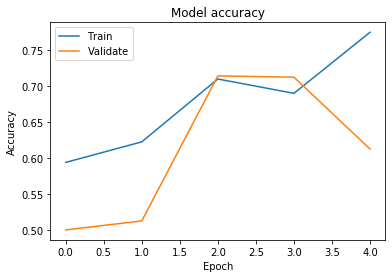

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [17]:
predictions = model.predict(validation)

In [18]:
predictions

array([[0.07059829],
       [0.49907196],
       [0.46836403],
       [0.06248025],
       [0.32513565],
       [0.05128131],
       [0.32675567],
       [0.4213441 ],
       [0.56888735],
       [0.194287  ],
       [0.31298903],
       [0.17964453],
       [0.48947152],
       [0.24456377],
       [0.30740064],
       [0.15416531],
       [0.3456867 ],
       [0.41096106],
       [0.18403453],
       [0.14527643],
       [0.18205895],
       [0.19609785],
       [0.57697123],
       [0.48437053],
       [0.18507136],
       [0.34554237],
       [0.04862694],
       [0.25378674],
       [0.10380609],
       [0.39370272],
       [0.56515896],
       [0.16944231],
       [0.4710087 ],
       [0.19523098],
       [0.4946217 ],
       [0.58937913],
       [0.57768047],
       [0.5613267 ],
       [0.15575252],
       [0.03502873],
       [0.06205104],
       [0.1496054 ],
       [0.09352943],
       [0.81584203],
       [0.38992646],
       [0.07108686],
       [0.68706596],
       [0.611

In [19]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [20]:
newpredictions =  np.rint(predictions)

In [21]:
newpredictions

array([[0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.00